In [24]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [25]:
url = "web_scraper/no_games.csv"
df = pd.read_csv(url)
df.head(15)

,actor,movie_or_TV_name
0,Chie Nakamura,Boruto: Naruto Next Generations
1,Chie Nakamura,The World's Finest Assassin Gets Reincarnated ...
2,Chie Nakamura,Jujutsu Kaisen
3,Chie Nakamura,Dororo
4,Chie Nakamura,Ace Attorney
5,Chie Nakamura,Devilman: Crybaby
6,Chie Nakamura,Vatican Miracle Examiner
7,Chie Nakamura,Naruto: Shippûden
8,Chie Nakamura,The Day Naruto Became Hokage
9,Chie Nakamura,Tokyo Ghoul: Pinto


In [26]:
df.shape

(17448, 2)

In [27]:
G = nx.from_pandas_edgelist(df.iloc[0:17448], 
                             source = "movie_or_TV_name", 
                             target = "actor", 
                             edge_attr=None, 
                             create_using=nx.DiGraph())

In [28]:
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 30]

In [29]:
to_be_removed[0:5]

["The World's Finest Assassin Gets Reincarnated in Another World as an Aristocrat",
 'Jujutsu Kaisen',
 'Dororo',
 'Ace Attorney',
 'Devilman: Crybaby']

In [30]:
for x in to_be_removed:
    G.remove_node(x)

In [31]:
colors = []
for node in G:
    if node in df["actor"].values:
        colors.append("lightblue") # Actor
    else: colors.append("red") # Project Title

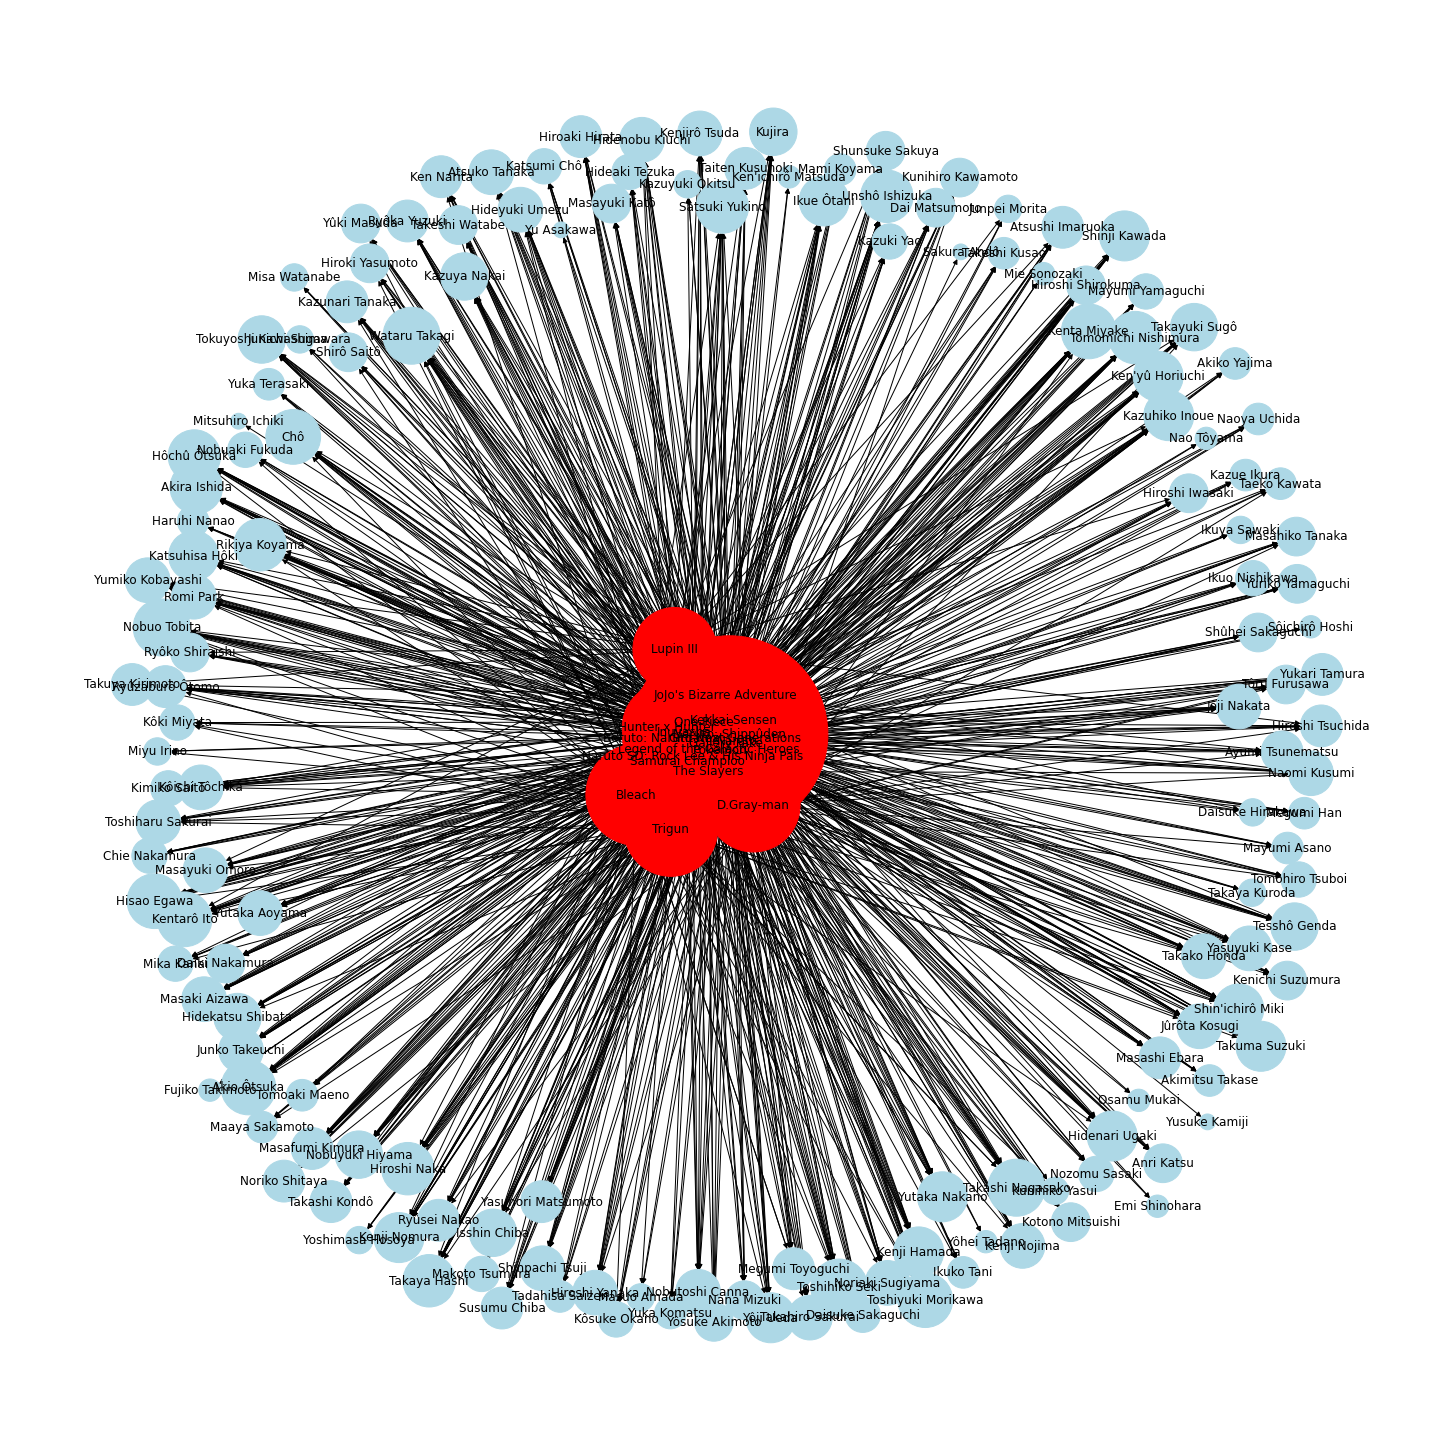

In [32]:
deg = G.degree()
plt.figure(figsize=(20, 20))
layout = nx.layout.fruchterman_reingold_layout(G, k=5/math.sqrt(G.order()))
nx.draw(G, layout,
        with_labels=True, 
        node_color = colors,
        node_size  = [250*deg[i] for i in G.nodes()])

In [33]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Naruto: Shippûden', 155),
 ('Naruto', 103),
 ('Pokémon', 85),
 ('Gintama', 82),
 ('One Piece', 73),
 ('Boruto: Naruto Next Generations', 64),
 ('Naruto SD: Rock Lee & His Ninja Pals', 44),
 ('Legend of the Galactic Heroes', 43),
 ("JoJo's Bizarre Adventure", 42),
 ('Bleach', 41),
 ('Inuyasha', 40),
 ('Samurai Champloo', 37),
 ('Trigun', 35),
 ('D.Gray-man', 35),
 ('Kekkai Sensen', 34),
 ('The Slayers', 34),
 ('Gallery Fake', 33),
 ('Hunter x Hunter', 31),
 ('Lupin III', 28),
 ('Takashi Nagasako', 13),
 ('Toshihiko Seki', 13),
 ('Wataru Takagi', 13),
 ('Nobuo Tobita', 13),
 ('Chô', 12),
 ('Akio Ôtsuka', 12),
 ('Kenta Miyake', 12),
 ('Hisao Egawa', 12),
 ('Toshiyuki Morikawa', 12),
 ('Kentarô Itô', 12),
 ('Rikiya Koyama', 11),
 ('Satsuki Yukino', 11),
 ('Hiroshi Naka', 11),
 ('Unshô Ishizuka', 11),
 ('Takaya Hashi', 11),
 ('Tomomichi Nishimura', 11),
 ('Hôchû Ôtsuka', 11),
 ('Akira Ishida', 11),
 ('Kazuhiko Inoue', 10),
 ('Hidenari Ugaki', 10),
 ('Kenji Nomura', 10),
 ('Katsuhisa Hôki